In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..") 
import descriptors.preprocessing as pp
import descriptors.dft_featurisation as dft_ft
from analysis import analysis_train_set_size, random_split, stratified_split 

In [2]:
df = pd.read_csv("../data/NiCOlit.csv")

df_dft, indexes = pp.preprocess(df, remove_small_doi=False)

In [3]:
df_dft

,index,substrate,coupling_partner,effective_coupling_partner,solvent,time,temperature,catalyst_precursor,reagents,effective_reagents,...,eq_substrate,eq_coupling_partner,eq_catalyst,eq_ligand,eq_reagent,2_steps,scheme_table,review,Mechanism,Lewis Acid
0,0,COc1ccc2ccccc2c1,[Li]c1ccccc1,[Li]c1ccccc1,toluene,12h,rt,Ni(cod)2,nan,NaN,...,1,1.5,0.05,0,0,NaN,Table 1,Research_Article,Murahashi,[Li]c1ccccc1
1,1,COc1ccc2ccccc2c1,[Li]c1ccccc1,[Li]c1ccccc1,toluene,12h,rt,Ni(cod)2,nan,NaN,...,1,1.5,0.05,0.1,0,NaN,Table 1,Research_Article,Murahashi,[Li]c1ccccc1
2,2,COc1ccc2ccccc2c1,[Li]c1ccccc1,[Li]c1ccccc1,toluene,12h,rt,Ni(cod)2,nan,NaN,...,1,1.5,0.05,0.1,0,NaN,Table 1,Research_Article,Murahashi,[Li]c1ccccc1
3,3,COc1ccc2ccccc2c1,[Li]c1ccccc1,[Li]c1ccccc1,toluene,12h,rt,Ni(cod)2,nan,NaN,...,1,1.5,0.05,0.1,0,NaN,Table 1,Research_Article,Murahashi,[Li]c1ccccc1
4,4,COc1ccc2ccccc2c1,[Li]c1ccccc1,[Li]c1ccccc1,toluene,12h,rt,Ni(cod)2,nan,NaN,...,1,1.5,0.05,0.1,0,NaN,Table 1,Research_Article,Murahashi,[Li]c1ccccc1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,1998,COc1ccc2ccccc2c1,CC2(C)COB(c1cc(C(F)(F)F)ccc1)OC2,CC1(C)COB(c2cccc(C(F)(F)F)c2)OC1,toluene,3h,120°C,Ni(cod)2,CC(C)(C)[O-].CC(C)(C)[O-].CC(C)(C)[O-].[Al+3],CC(C)(C)[O-].[Al+3].[O-]C(C)(C)C.[O-]C(C)(C)C,...,1,1.5,0.1,0.4,0.2,NaN,page 129 - Scheme 58,Research_Article,Suzuki,CC(C)(C)O[Al](OC(C)(C)C)OC(C)(C)C
1528,1999,COc1ccc2ccccc2c1,Cc2ccc(B1OC(C)(C)C(C)(C)O1)cc2,Cc1ccc(B2OC(C)(C)C(C)(C)O2)cc1,toluene,3h,120°C,Ni(cod)2,CC(C)(C)[O-].CC(C)(C)[O-].CC(C)(C)[O-].[Al+3],CC(C)(C)[O-].[Al+3].[O-]C(C)(C)C.[O-]C(C)(C)C,...,1,1.5,0.1,0.4,0.2,NaN,page 129 - Scheme 58,Research_Article,Suzuki,CC(C)(C)O[Al](OC(C)(C)C)OC(C)(C)C
1529,2000,COc1ccc2ccccc2c1,CC(=O)c2ccc(B1OCC(C)(C)CO1)cc2,CC(=O)c1ccc(B2OCC(C)(C)CO2)cc1,toluene,3h,120°C,Ni(cod)2,CC(C)(C)[O-].CC(C)(C)[O-].CC(C)(C)[O-].[Al+3],CC(C)(C)[O-].[Al+3].[O-]C(C)(C)C.[O-]C(C)(C)C,...,1,1.5,0.1,0.4,0.2,NaN,page 129 - Scheme 58,Research_Article,Suzuki,CC(C)(C)O[Al](OC(C)(C)C)OC(C)(C)C
1530,2001,COc1ccc2ccccc2c1,CN(C)c2ccc(B1OCC(C)(C)CO1)cc2,CN(C)c1ccc(B2OCC(C)(C)CO2)cc1,toluene,3h,120°C,Ni(cod)2,CC(C)(C)[O-].CC(C)(C)[O-].CC(C)(C)[O-].[Al+3],CC(C)(C)[O-].[Al+3].[O-]C(C)(C)C.[O-]C(C)(C)C,...,1,1.5,0.1,0.4,0.2,NaN,page 129 - Scheme 58,Research_Article,Suzuki,CC(C)(C)O[Al](OC(C)(C)C)OC(C)(C)C


In [5]:
X_dft, y_dft, DOI_dft, mechanisms_dft, origins_dft, sub_dft, lig_dft = dft_ft.process_dataframe_dft(df_dft, 
                                                                                                    data_path="../data/utils/", origin=False)

In [6]:
# Random Split
values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft, y_dft, origins_dft, mechanisms_dft, n_iterations=10)
display_df =  pd.DataFrame(zip(values, baseline_values, model_values, stratification_values, additional_stratification_values), 
                           columns = ['Yields', 'Baseline', 'Predicted Yields', 'Origin', 'Coupling Partner'])

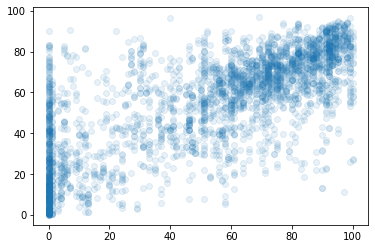

In [7]:
plt.scatter(values, model_values, alpha=0.1)
plt.show()

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(values, model_values))
print(mean_absolute_error(values, model_values))
print(mean_squared_error(values, model_values)**0.5)

0.5437057173034706
16.40509358366455
22.60593510133304


In [9]:
# Restricted CP and Substrates performances
n_iterations = 100
r2_sub = []
length_sub = []
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], 
                                                                                                                  sub_dft[indexes], n_iterations=n_iterations)
    print(sub, len(indexes), round(r2_score(values, model_values), 3))
    r2_sub.append(round(r2_score(values, model_values), 3))
    length_sub.append(len(indexes))

OAc 72 0.407
OC(=O)N 279 0.369
OC(=O)O 85 0.669
OCH3 574 0.583
OCOC 17 -0.378
OPh 3 -1.335
OPiv 417 0.575
OSi(C)(C)C 23 -0.269
Otriazine 54 0.395
others 8 -0.002


## Results with DOI <20 removed
OAc 72 0.404

OC(=O)N 215 0.348

OC(=O)O 82 0.641

OCH3 546 0.569

OCOC 17 -0.367

OPh 3 -1.304

OPiv 394 0.555

OSi(C)(C)C 23 -0.284

Otriazine 54 0.391

In [10]:
r2_cp = []
length_cp = []
for sub in np.unique(mechanisms_dft):
    indexes = np.where(mechanisms_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], 
                                                                                                                  mechanisms_dft[indexes], n_iterations=n_iterations)
    print(sub, len(indexes), round(r2_score(values, model_values), 3))
    r2_cp.append(round(r2_score(values, model_values),3))
    length_cp.append(len(indexes))

Al 53 0.17
B 534 0.507
C-H 274 0.555
CO2 87 0.496
Li 52 0.049
NCO 57 0.295
NH 27 -0.033
P 6 0.109
RMgX 321 0.48
Si 53 0.59
Zn 68 0.572


## Results with DOI <20 removed
Al 53 0.175

B 472 0.447

C-H 271 0.557

CO2 87 0.497

Li 52 0.044

NCO 57 0.29

NH 27 -0.031

RMgX 266 0.476

Si 53 0.591

Zn 68 0.573